In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
haberman=pd.read_csv("haberman.csv",names=['age','op_year','lymph_nodes','surv_status'])
haberman['op_year'].value_counts()
print(haberman.shape)

#dimensions of the data set

(306, 4)


In [2]:
# describbes survival calss label counts
print(haberman.columns)
haberman['surv_status'].value_counts()

Index(['age', 'op_year', 'lymph_nodes', 'surv_status'], dtype='object')


1    225
2     81
Name: surv_status, dtype: int64

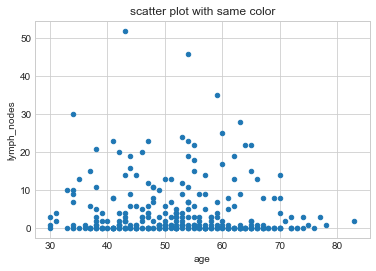

In [30]:
# 2d scatter plot 
haberman.plot(kind='scatter', x='age', y='lymph_nodes')
plt.title('scatter plot with same color')
plt.show()

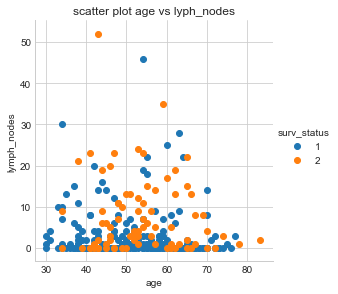

In [20]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='surv_status',size=4)\
    .map(plt.scatter,'age','lymph_nodes')\
    .add_legend()
plt.title('scatter plot age vs lyph_nodes')
plt.show()
# blue and red points are not well separated. All points are mixed with other color points.
#but two red points are well separated based on age and lymph_nodes.
#Only some points are separated completely. I observed age < 34 patients are survived.
#If I draw a line at age 38 has highest probability of survival.
#If age>80 and lymph_nodes>50 then patient is died.
#Here there is no chance to linearly separable completely based on ages and lymph nodes.

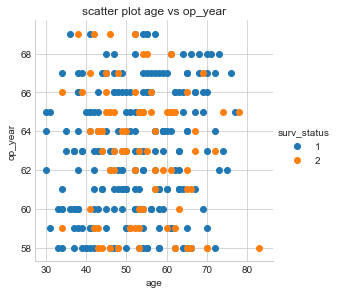

In [21]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='surv_status',size=4)\
    .map(plt.scatter,'age','op_year')\
    .add_legend()
plt.title('scatter plot age vs op_year')
plt.show()
#Here also blue and red points are not well separated.
#only age >80 points is separated 
#If age>80 then patient is died.

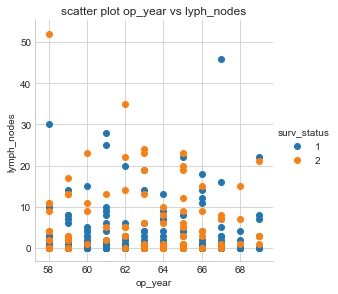

In [28]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='surv_status',size=4)\
    .map(plt.scatter,'op_year','lymph_nodes')\
    .add_legend()
plt.title('scatter plot op_year vs lyph_nodes')

plt.show()
#Here also blue and red points are not well separated.
#only If lymph_nodes >50 then patient is died.

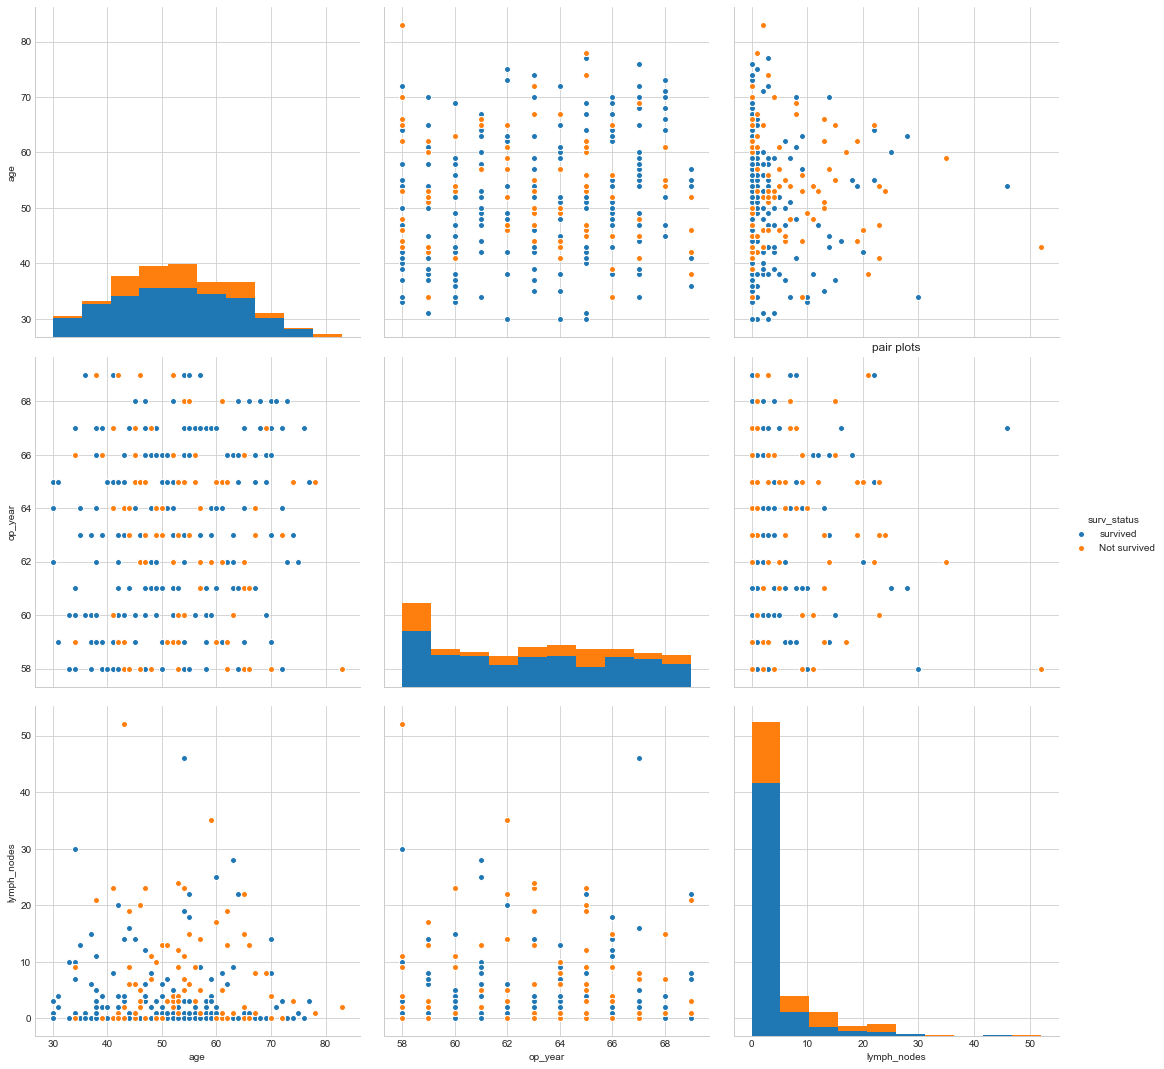

In [29]:
#pair plots
haberman['surv_status'] = haberman['surv_status'].apply(lambda x: 'survived' if x == 1 else 'Not survived')
plt.close()
sns.set_style('whitegrid')
sns.pairplot(haberman, hue='surv_status', size=5)
plt.title("pair plots")
plt.show()
#I observed same as in scatter plots only.

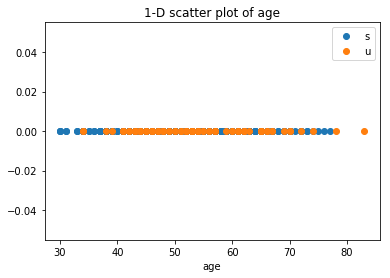

In [23]:
haberman_one = haberman.loc[haberman["surv_status"]==1]
haberman_two = haberman.loc[haberman["surv_status"]==2]
plt.plot(haberman_one['age'], np.zeros_like(haberman_one['age']), 'o')
plt.plot(haberman_two['age'], np.zeros_like(haberman_two['age']), 'o')
plt.title("1-D scatter plot of age")
plt.legend("surv_status")
plt.xlabel("age")
plt.show()
#Very hard to find out the points because points are overlapped

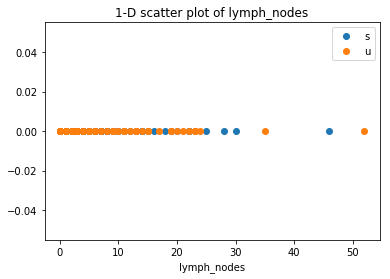

In [22]:
plt.plot(haberman_one['lymph_nodes'], np.zeros_like(haberman_one['lymph_nodes']), 'o')
plt.plot(haberman_two['lymph_nodes'], np.zeros_like(haberman_two['lymph_nodes']), 'o')
plt.title("1-D scatter plot of lymph_nodes")
plt.legend("surv_status")
plt.xlabel("lymph_nodes")
plt.show()
#Very hard to find out the points because points are overlapped
#only one points separated lymph_nodes>50

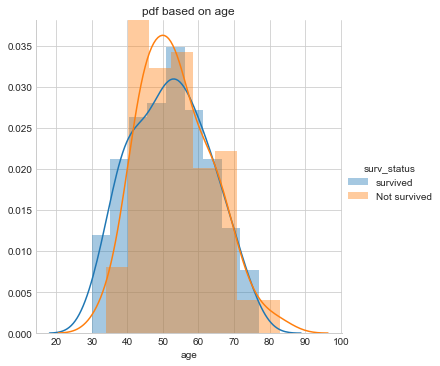

In [41]:
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(haberman, hue="surv_status", size=5) \
   .map(sns.distplot, "age",) \
   .add_legend()
plt.title("pdf based on age")
plt.show();
#If age<34 then survived and age>75 is died.
#If age>35 and age <82 then patients are died.
#If age >30 and age< 75 then patient are survived.
#I observer age=55 has more survival rate(probability) and age between 40-45 has more death rate probability.

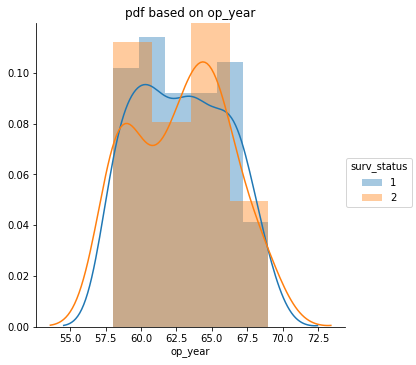

In [31]:
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(haberman, hue="surv_status", size=5) \
   .map(sns.distplot, "op_year") \
   .add_legend();
plt.title("pdf based on op_year")
plt.show();
#I observerd Op_year not a good feature to classify this data set

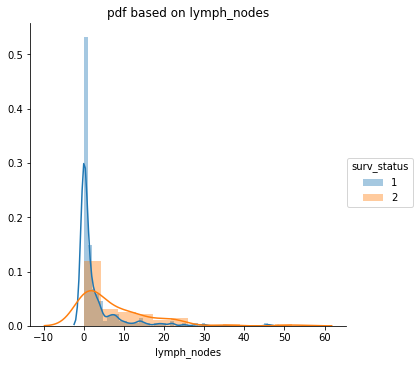

In [32]:
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(haberman, hue="surv_status", size=5) \
   .map(sns.distplot, "lymph_nodes") \
   .add_legend();
plt.title("pdf based on lymph_nodes")
plt.show();
#if Lymph_nodes=0 survival rate probability is high
#If lymph_node=3 death rate is high probability

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


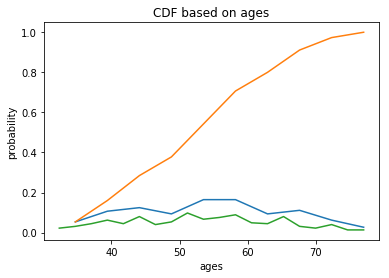

In [25]:
#plot cdf based on age
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
haberman=pd.read_csv("haberman.csv",names=['age','op_year','lymph_nodes','surv_status'])
haberman_one = haberman.loc[haberman["surv_status"]==1]
haberman_two = haberman.loc[haberman["surv_status"]==2]
counts, bin_edges = np.histogram(haberman_one['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
counts, bin_edges = np.histogram(haberman_one['age'], bins=20, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.title("CDF based on ages")
plt.xlabel("ages")
plt.ylabel("probability")
plt.show();
#cdf is reaches to 1.

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


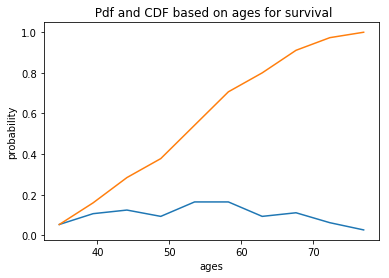

In [34]:
counts, bin_edges = np.histogram(haberman_one['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title(" Pdf and CDF based on ages for survival")
plt.xlabel("ages")
plt.ylabel("probability")
plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


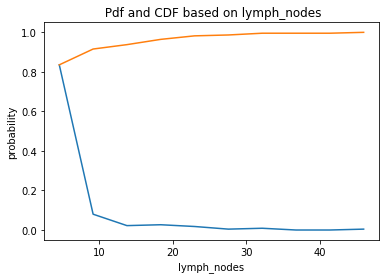

In [31]:
counts, bin_edges = np.histogram(haberman_one['lymph_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title(" Pdf and CDF based on lymph_nodes")
plt.xlabel("lymph_nodes")
plt.ylabel("probability")
plt.show()
#If lymph nodes <10 then 90% chances for survival

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


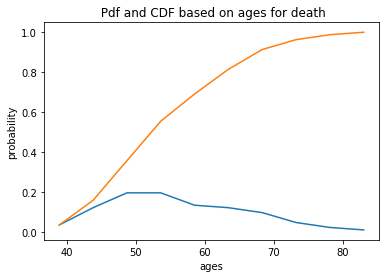

In [37]:
counts, bin_edges = np.histogram(haberman_two['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title(" Pdf and CDF based on ages for death" )
plt.xlabel("ages")
plt.ylabel("probability")
plt.show();
#if age>35 and age<=50 then death rate is 0.4 probability
#if age>35 and age<=70 then death rate is 0.85 probability

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


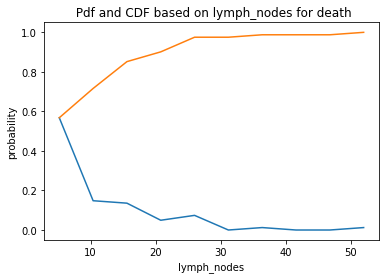

In [38]:
counts, bin_edges = np.histogram(haberman_two['lymph_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title(" Pdf and CDF based on lymph_nodes for death" )
plt.xlabel("lymph_nodes")
plt.ylabel("probability")
plt.show();
#if lymph_nodes<30 then death rate is 0.95 probability

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


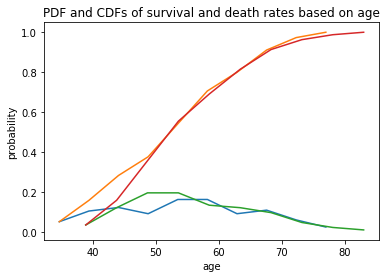

In [88]:
#PDF and CDF's of survival and deaths based on ages
counts, bin_edges = np.histogram(haberman_one['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# not survived
counts, bin_edges = np.histogram(haberman_two['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("PDF and CDFs of survival and death rates based on age")
plt.xlabel("age")
plt.ylabel("probability")
plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


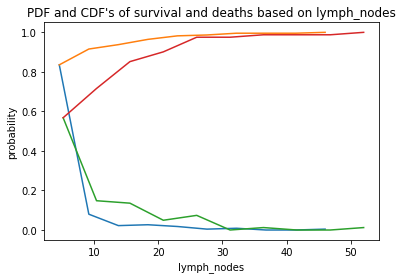

In [89]:
#PDF and CDF's of survival and deaths based on lymph_nodes
counts, bin_edges = np.histogram(haberman_one['lymph_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

# not survived
counts, bin_edges = np.histogram(haberman_two['lymph_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("PDF and CDF's of survival and deaths based on lymph_nodes")
plt.xlabel("lymph_nodes")
plt.ylabel("probability")
plt.show();

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


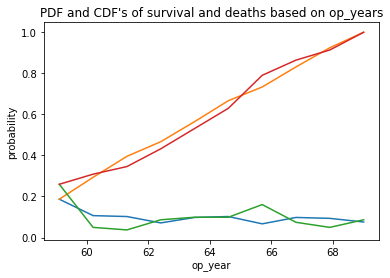

In [90]:
#PDF and CDF's of survival and deaths based on op_year
counts, bin_edges = np.histogram(haberman_one['op_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

# not survived
counts, bin_edges = np.histogram(haberman_two['op_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("PDF and CDF's of survival and deaths based on op_years")
plt.xlabel("op_year")
plt.ylabel("probability")
plt.show();

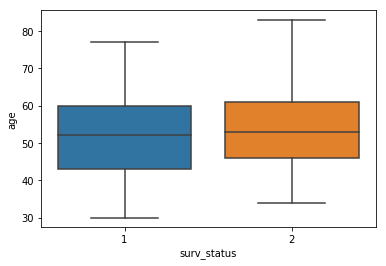

In [42]:
#box plot
sns.boxplot(x='surv_status',y='age', data=haberman)
plt.show()
#From the box plots with whiskers, I observed 25% of non survived patients age is between 35 and 45 and age>75 then patient non survived

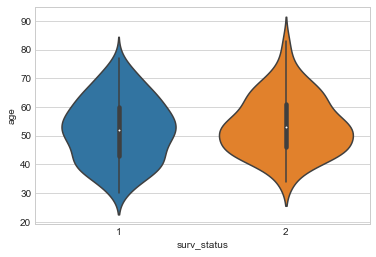

In [33]:
sns.violinplot(x="surv_status", y="age", data=haberman, size=8)
plt.show()
#From the violin plots I have observed most survival patients age is between 42 to 60
#most of the non survived patients age is between 45 to 62.

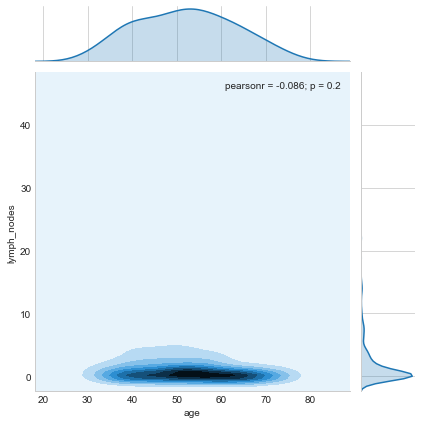

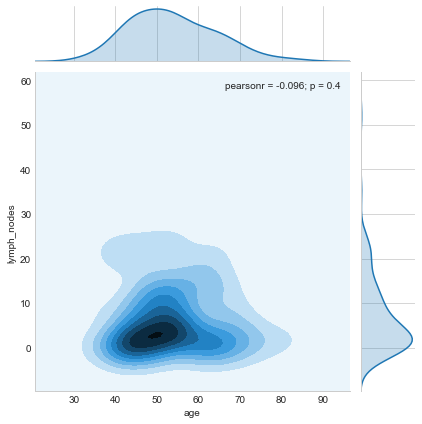

In [36]:
sns.jointplot(x="age", y="lymph_nodes", data=haberman_one, kind="kde")
sns.jointplot(x="age", y="lymph_nodes", data=haberman_two, kind="kde");
plt.show();
#From contour plots I have observed lymph nodes has more in who are not survived.

In [8]:
#Mean, Variance, Std-deviation,
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
haberman=pd.read_csv("haberman.csv",names=['age','op_year','lymph_nodes','surv_status'])
haberman_one = haberman.loc[haberman["surv_status"]==1]
haberman_two = haberman.loc[haberman["surv_status"]==2]
print("Means:")
print(np.mean(haberman_one["age"]))
#Mean with an outlier.
print(np.mean(np.append(haberman_one["age"],500)));
print(np.mean(haberman_two["age"]))

print("\nStd-dev:");
print(np.std(haberman_one["age"]))
print(np.std(haberman_two["age"]))
#If I add outlier 500 to its mean its slightly effect the mean of survived persons age.

Means:
52.01777777777778
54.0
53.67901234567901

Std-dev:
10.98765547510051
10.10418219303131


In [51]:
print("\nMedians:")
print(np.median(haberman_one["age"]))
#Median with an outlier
print(np.median(np.append(haberman_one["age"],50)));
print(np.median(haberman_two["age"]))

print("\nQuantiles:")
print(np.percentile(haberman_one["age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_two["age"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haberman_one["age"],90))
print(np.percentile(haberman_two["age"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_one["age"]))
print(robust.mad(haberman_two["age"]))
#median doesn't effect with the outliers.


Medians:
52.0
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


In [91]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
haberman.head()
data = []
clusters = []
colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)']
for i in range(len(haberman['surv_status'].unique())):
    name = haberman['surv_status'].unique()[i]
    color = colors[i]
    x = haberman[haberman['surv_status'] == name ]['age']
    y = haberman[haberman['surv_status'] == name ]['op_year']
    z = haberman[haberman['surv_status'] == name ]['lymph_nodes']
    
    trace = dict(
        name = name,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, color=color, line=dict(width=0) ) )
    data.append( trace )
    
    layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Haberman data set',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
)
fig = dict(data=data, layout=layout)
url = py.plot(fig, filename='srinivas', validate=False)

#3-D graph is displayed in new tab